## **Importing the libraries and Loading the Dataset**

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [ ]:
df = pd.read_csv("/content/Train_1.csv")
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
test = pd.read_csv("/content/Test_1.csv")
submission = pd.read_csv("/content/Customer_Segmentation_submission.csv")

In [ ]:
df.shape

(8068, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Distribution of the target variable

In [ ]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

We have a semi balanced target class

In [ ]:
df.drop(['ID'],axis=1, inplace=True)

##**Exploratory Data Analysis**



In [ ]:
df['Age'].min() , df['Age'].max()

(18, 89)

In [ ]:
df['Age'] = pd.cut(x=df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90],
                     labels=['10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89'])

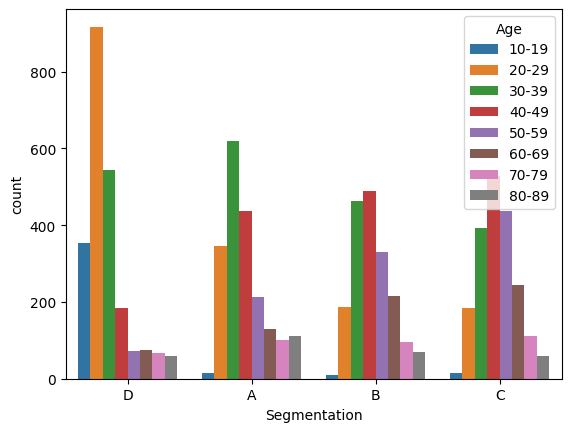

In [ ]:
sns.countplot(data=df,x='Segmentation',hue='Age')
plt.show()

Considering the Age group there seems to be less differentiation between B and C class, although it shows signification variation in count between D, A, (B/C) classes

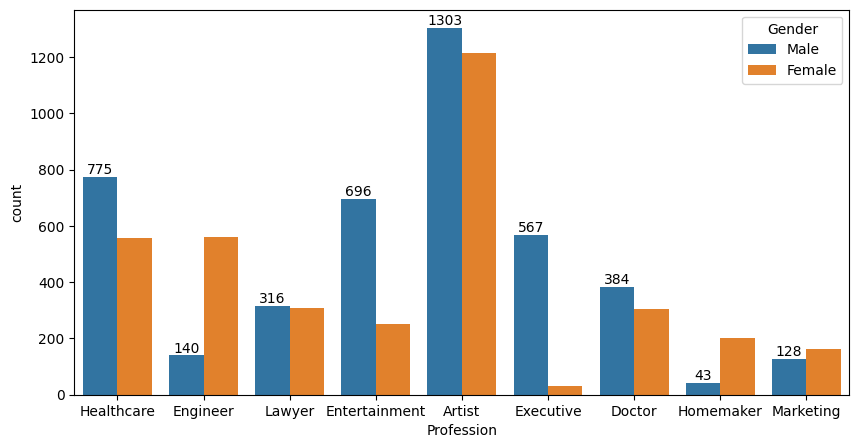

In [ ]:
plt.figure(figsize=(10,5))
a = sns.countplot(data=df,x='Profession',hue='Gender')
plt.bar_label(a.containers[0])
plt.show()

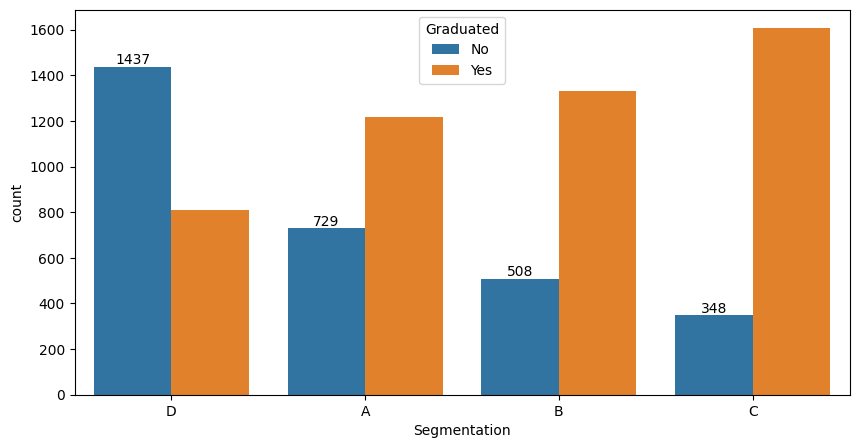

In [ ]:
plt.figure(figsize=(10,5))
a = sns.countplot(data=df,x='Segmentation',hue='Graduated')
plt.bar_label(a.containers[0])
plt.show()

C has the most graduated people whereas D has the least graduated people

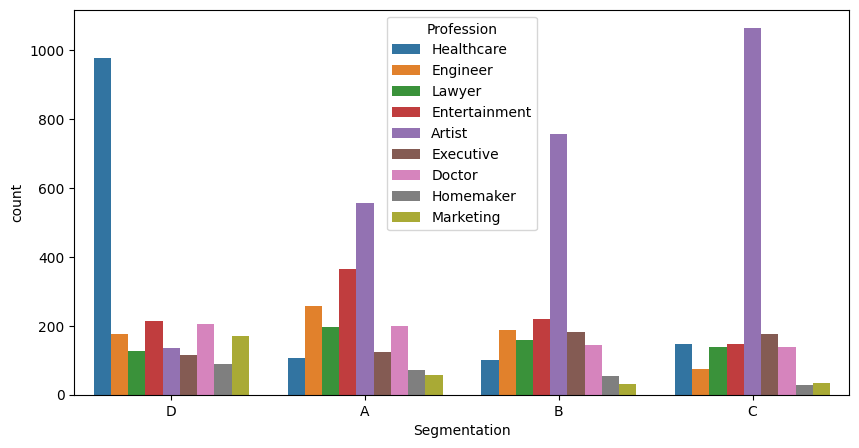

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Segmentation',hue='Profession')
plt.show()

Seems like doctor's profession is thriving in A,B and C class whereas Healthcare is a popular profession in D class

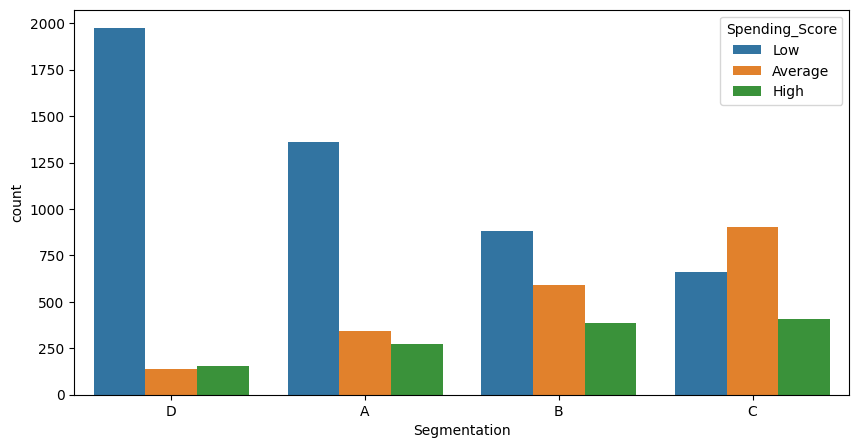

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Segmentation',hue='Spending_Score')
plt.show()

Spending score from highest to lowest:
C > B > A > D

C class must be filled rich people
As already observed D class is populated with most of the yongsters, therefore they have less salary and therefore, less spending score

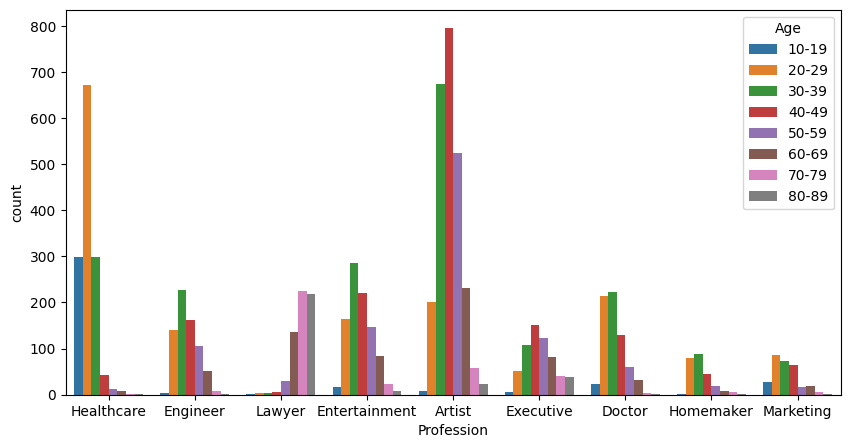

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Profession',hue='Age')
plt.show()

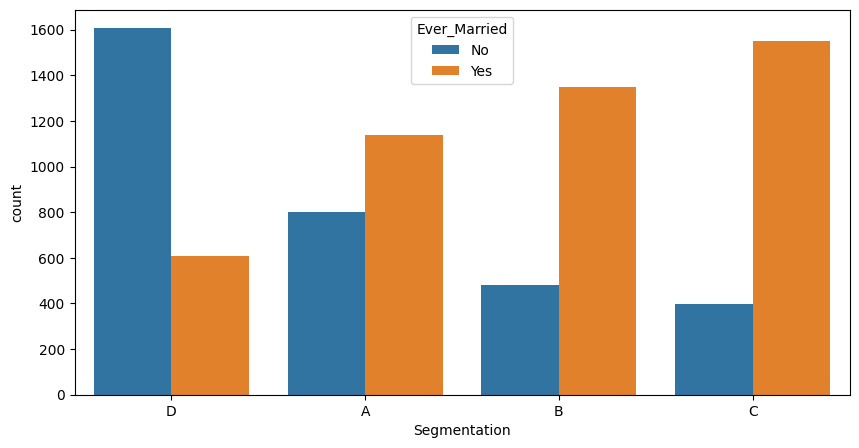

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Segmentation',hue='Ever_Married')
plt.show()

Ranked according to Married population:
C > B > A > D

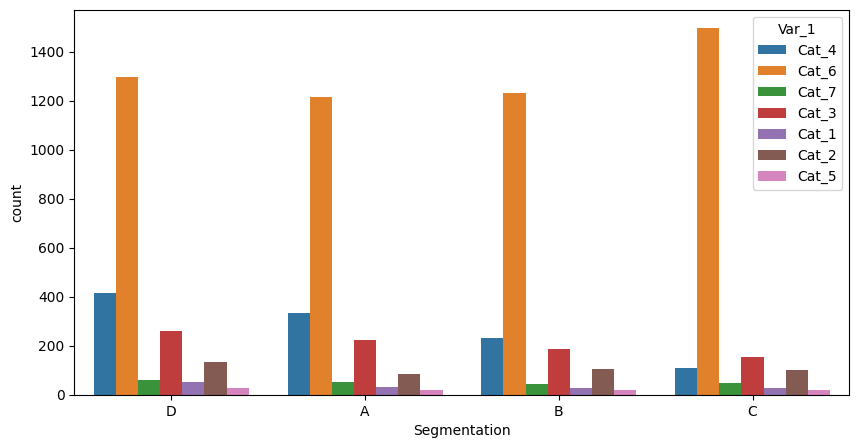

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Segmentation',hue='Var_1')
plt.show()

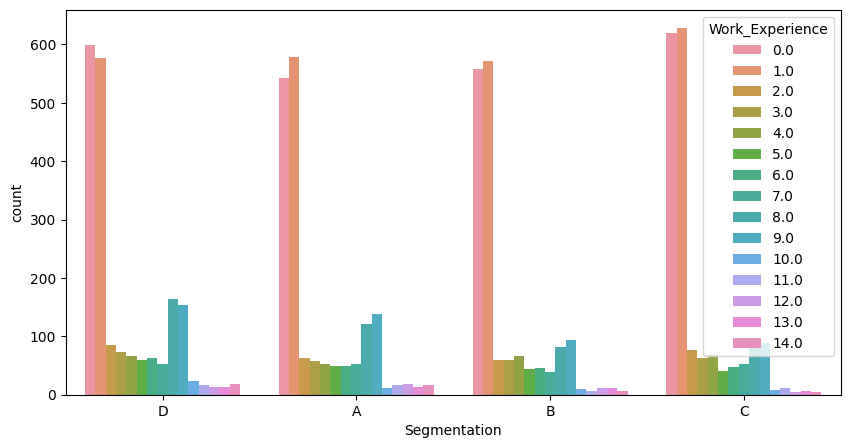

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Segmentation',hue='Work_Experience')
plt.show()

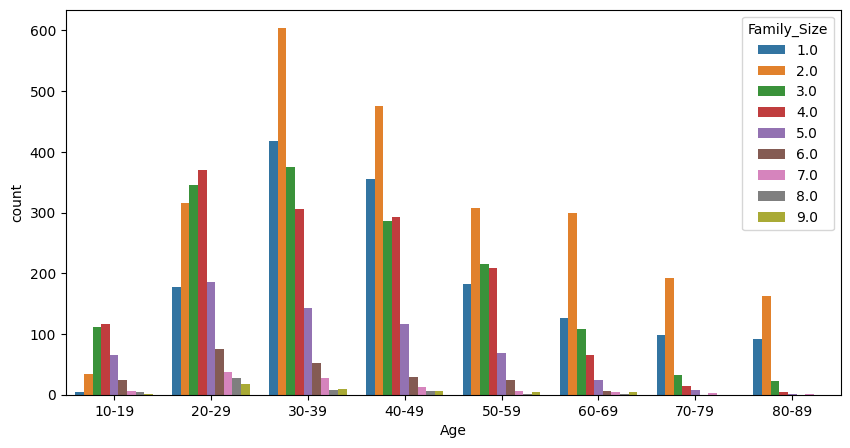

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Age',hue='Family_Size')
plt.show()

## **Handling Null Values**

In [ ]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

columns = ["Gender","Ever_Married","Age","Graduated","Profession","Var_1",'Family_Size','Work_Experience']
target_feature = 'Segmentation'

# Iterate through other categorical features
for column in columns:
    contingency_table = pd.crosstab(df[column], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p > 0.01:
      df.drop(column,axis=1, inplace=True)
    else:
      print(f'Chi-Square value for {column}: {chi2}, p-value: {p}')

Chi-Square value for Gender: 11.429085691050648, p-value: 0.009618143763412594
Chi-Square value for Ever_Married: 1410.2436663127228, p-value: 1.7634922738184225e-305
Chi-Square value for Age: 2241.5379223436003, p-value: 0.0
Chi-Square value for Graduated: 1067.3613235344474, p-value: 4.384656787114855e-231
Chi-Square value for Profession: 2683.620906478794, p-value: 0.0
Chi-Square value for Var_1: 243.57726091271394, p-value: 1.646068148998022e-41
Chi-Square value for Family_Size: 667.1258399555101, p-value: 2.0127132669161069e-125
Chi-Square value for Work_Experience: 103.56611814666127, p-value: 4.0996144906712997e-07


In [ ]:
from scipy.stats import chi2_contingency

columns = ["Gender","Ever_Married","Age","Graduated","Profession","Var_1",'Family_Size','Work_Experience']
target_feature = 'Segmentation'
dict1 = {}

# Iterate through other categorical features
for col in columns:
    target_feature = col
    listt = []
    for column in columns:
      if col != column:
        contingency_table = pd.crosstab(df[column], df[target_feature])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        if p <= 0.05:
          listt.append(column)
    dict1[col] = listt
print(dict1)

{'Gender': ['Ever_Married', 'Age', 'Graduated', 'Profession', 'Var_1', 'Family_Size', 'Work_Experience'], 'Ever_Married': ['Gender', 'Age', 'Graduated', 'Profession', 'Var_1', 'Family_Size', 'Work_Experience'], 'Age': ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Family_Size', 'Work_Experience'], 'Graduated': ['Gender', 'Ever_Married', 'Age', 'Profession', 'Var_1', 'Family_Size'], 'Profession': ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Var_1', 'Family_Size', 'Work_Experience'], 'Var_1': ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Family_Size', 'Work_Experience'], 'Family_Size': ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Var_1', 'Work_Experience'], 'Work_Experience': ['Gender', 'Ever_Married', 'Age', 'Profession', 'Var_1', 'Family_Size']}


In [ ]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
data = df.groupby('Age')['Ever_Married'].agg(pd.Series.mode)
data

Age
10-19     No
20-29     No
30-39     No
40-49    Yes
50-59    Yes
60-69    Yes
70-79    Yes
80-89    Yes
Name: Ever_Married, dtype: object

In [ ]:
df['Ever_Married'] = df.groupby(['Age','Segmentation'], sort=False,group_keys=False)['Ever_Married'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df['Graduated'] = df.groupby(['Age','Segmentation'], sort=False,group_keys=False)['Graduated'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Work_Experience has a lot of null values, so i'll just drop that column

In [ ]:
df.drop('Work_Experience', axis=1, inplace=True)

In [ ]:
df.isna().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession        124
Spending_Score      0
Family_Size       335
Var_1              76
Segmentation        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
Segmentation      0
dtype: int64

<Axes: xlabel='Family_Size', ylabel='Density'>

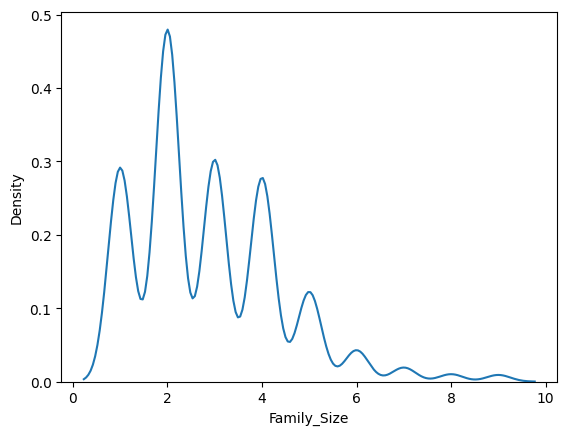

In [ ]:
sns.kdeplot(data=df, x="Family_Size")

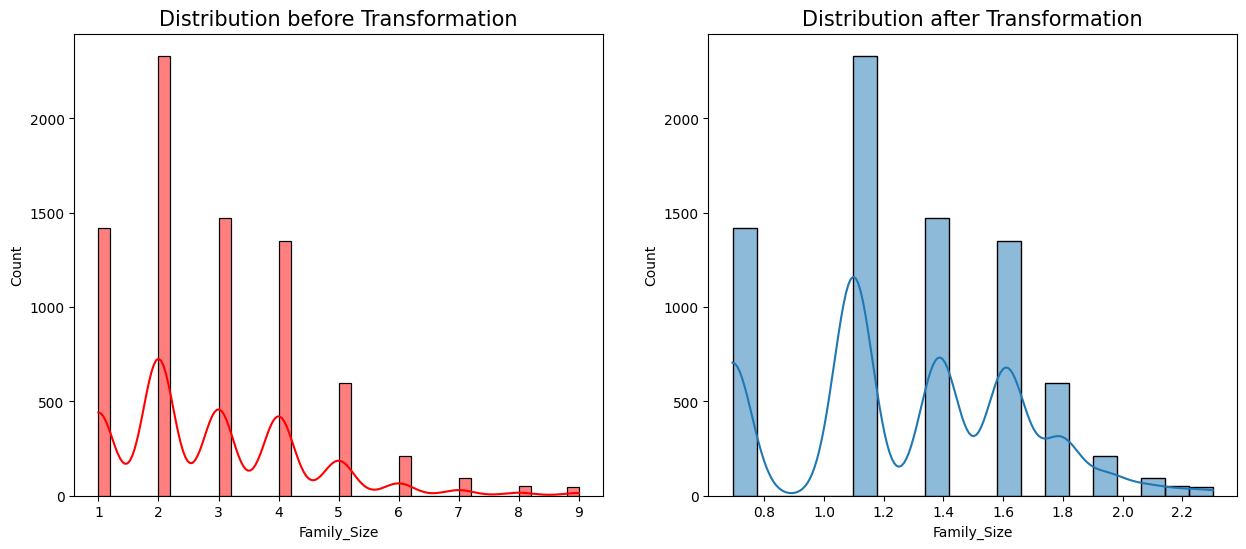

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot

    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    return df_log

df['Family_Size']=logTrans(feature="Family_Size")

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop(['Segmentation'],axis=1)
y = df['Segmentation']

## One-Hot Encoding

In [ ]:
data = pd.get_dummies(X, drop_first=True)
data.head(5)

,Family_Size,Gender_Male,Ever_Married_Yes,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.609438,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1.386294,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.693147,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.098612,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,1.945910,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
"""from sklearn.preprocessing import LabelEncoder

X_enc = X.copy()
for col in X.columns:
    lb = LabelEncoder() # Shift + Tab
    X_enc[col] = lb.fit_transform(X[col].values)

X = X_enc
X.head()"""

'from sklearn.preprocessing import LabelEncoder\n\nX_enc = X.copy()\nfor col in X.columns:\n    lb = LabelEncoder() # Shift + Tab\n    X_enc[col] = lb.fit_transform(X[col].values)\n\nX = X_enc\nX.head()'

In [ ]:
y.head(5)

0    D
1    A
2    B
3    B
4    A
Name: Segmentation, dtype: object

Training the model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# dividing the data
X_train, X_test, y_train, y_test = train_test_split(data,y)

In [ ]:
svc = SVC(C=5,kernel='rbf')
svc.fit(X_train, y_train)

SVC(C=5)

In [ ]:
svc.score(X_test, y_test)  # validation dataset

0.5228684359119141

K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
model.score(X_test, y_test)

0.4901185770750988

In [ ]:
dict1 = {}
for col in X.columns:
  df1 = X.drop(col,axis=1)
  data = pd.get_dummies(df1, drop_first=True)

  # dividing the data
  X_train, X_test, y_train, y_test = train_test_split(data,y)

  svc = SVC(C=5,kernel='rbf')
  svc.fit(X_train, y_train)

  score = svc.score(X_test, y_test)  # validation dataset

  dict1[col] = score


print(dict1)


{'Gender': 0.5217391304347826, 'Ever_Married': 0.5143986448334275, 'Age': 0.502540937323546, 'Graduated': 0.48955392433653305, 'Profession': 0.4816487859966121, 'Spending_Score': 0.4901185770750988, 'Family_Size': 0.5076228119706381, 'Var_1': 0.5070581592320723}


In [ ]:
data.columns

Index(['Family_Size', 'Gender_Male', 'Ever_Married_Yes', 'Age_20-29',
       'Age_30-39', 'Age_40-49', 'Age_50-59', 'Age_60-69', 'Age_70-79',
       'Age_80-89', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low'],
      dtype='object')